## **Phase 1 Exploratory Analysis: Water Usage**

In this section, I am exploring the following:

* How much water is used for the following per county:
    - Agriculture
    - Residential outdoor use (secondary)
    - Residential indoor use (primary)
    - Commercial potable use
    - Institutional potable use
    - Industrial potable use


In [38]:
import pandas as pd

In [39]:
# Import Municipality and Industrial data for each year per county or state-wide
def import_data(region, year):
    df = pd.read_csv("./data/" + year + "_MI_" + region + ".csv")
    return df

In [40]:
# Import state-wide data
state_MI_2015 = import_data("state", "2015")
state_MI_2016 = import_data("state", "2016")
state_MI_2017 = import_data("state", "2017")
state_MI_2018 = import_data("state", "2018")
state_MI_2019 = import_data("state", "2019")

# Import county-wide data
county_MI_2015 = import_data("county", "2015")
county_MI_2016 = import_data("county", "2016")
county_MI_2017 = import_data("county", "2017")
county_MI_2018 = import_data("county", "2018")
county_MI_2019 = import_data("county", "2019")

First let's merge state-wide data from each year to one dataframe. 

    

In [44]:
# Merge all state data to one dataframe
df_state = pd.concat([state_MI_2015, state_MI_2016, state_MI_2017, state_MI_2018, state_MI_2019])

In [88]:
df_state

,OBJECTID_1,STATE,acres,sqmi,TotalGPCD,TotPotGPCD,ResPotGPCD,ComPotGPCD,InsPotGPCD,IndPotGPCD,...,InsSecoUse,IndSecoUse,TotPotaSup,PotaWelSup,PotaSprSup,PotaSurSup,Year,SHAPE_Length,SHAPE_Area,OBJECTID
0,1.0,Utah,54315900,84868.5,239,165,111,32,16,6,...,53281.09,22.00,1134911.58,518010.10,182432.50,434469.00,2015,1.972272e+06,2.198085e+11,NaN
0,1.0,Utah,54315900,84868.5,245,161,110,30,14,6,...,59312.10,27.00,1137366.30,517088.00,180053.40,440224.60,2016,1.972272e+06,2.198085e+11,NaN
0,NaN,Utah,54315900,84868.5,244,162,110,29,16,6,...,56859.14,28.95,1137366.34,517087.99,180053.44,440224.57,2017,1.972272e+06,2.198085e+11,1.0
0,NaN,Utah,54315900,84868.5,241,164,112,28,17,7,...,NaN,NaN,1138382.30,518295.40,179767.20,440319.40,2018,1.972272e+06,2.198085e+11,1.0
0,NaN,Utah,54315900,84868.5,223,150,102,25,15,7,...,NaN,NaN,1138382.10,518295.50,179767.30,440319.40,2019,1.972272e+06,2.198085e+11,1.0


In [80]:
df_state[['Year', 'TotalGPCD', 'TotPotGPCD', 'TotSecGPCD']]

,Year,TotalGPCD,TotPotGPCD,TotSecGPCD
0,2015,239,165,75
0,2016,245,161,84
0,2017,244,162,82
0,2018,241,164,77
0,2019,223,150,73


### How has water usage across the state changed between 2015-2019? How much water usage can be accounted for by potable (treated) versus secondary (untreated) use?

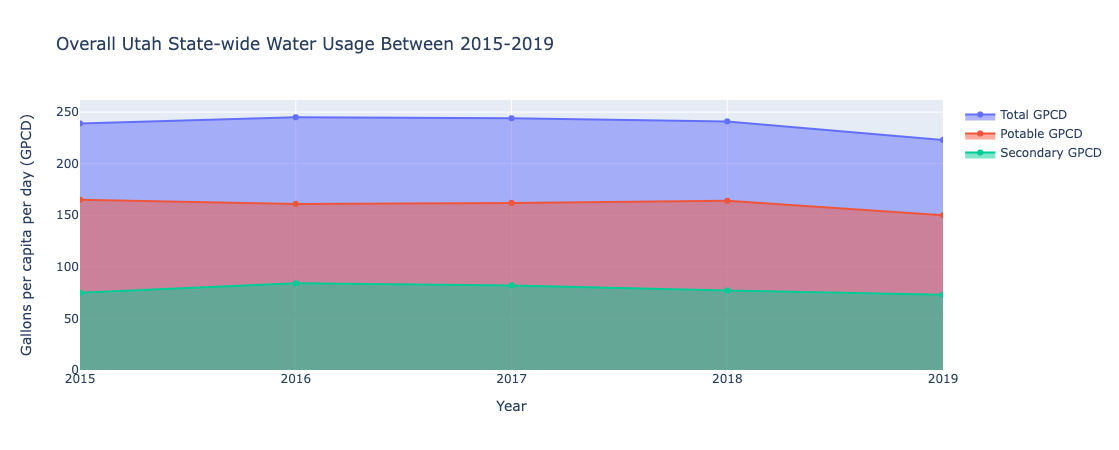

In [87]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Total GPCD",
    x=df_state['Year'], 
    y=df_state['TotalGPCD'], 
    fill='tozeroy',
    text='Total GPCD'
)) 

fig.add_trace(go.Scatter(
    name="Potable GPCD",
    x=df_state['Year'], 
    y=df_state['TotPotGPCD'],
    fill='tozeroy',
    text='Potable GPCD'
)) 

fig.add_trace(go.Scatter(
    name="Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['TotSecGPCD'],
    fill='tozeroy',
    text='Secondary GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Overall Utah State-wide Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

Between 2015 and 2019, water usage across the state seems to have remained steady over the years, with total GPCD remaining a little under 250 GPCD. Around 64% of that can be attributed to potable use, and the remaining attributed to secondary use. 

### How is state-wide water usage being distributed between residential, industrial, institutional, and commercial properties?

In [89]:
df_state[['Year', 'TotalGPCD', 'TotPotGPCD', 'ResPotGPCD', 'ComPotGPCD', 'InsPotGPCD', 'IndPotGPCD']]

,Year,TotalGPCD,TotPotGPCD,ResPotGPCD,ComPotGPCD,InsPotGPCD,IndPotGPCD
0,2015,239,165,111,32,16,6
0,2016,245,161,110,30,14,6
0,2017,244,162,110,29,16,6
0,2018,241,164,112,28,17,7
0,2019,223,150,102,25,15,7


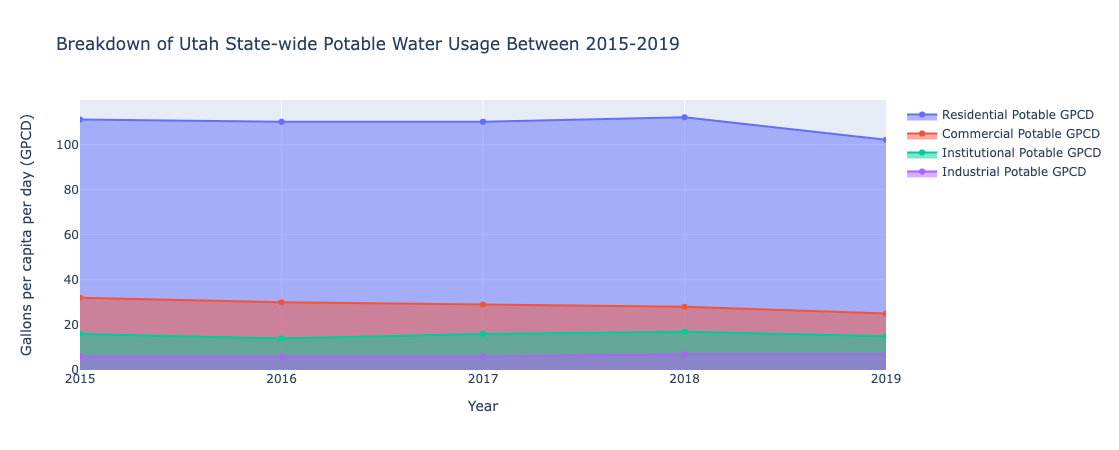

In [94]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ResPotGPCD'],
    fill='tozeroy',
    text='Residential Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ComPotGPCD'],
    fill='tozeroy',
    text='Commercial Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Potable GPCD",
    x=df_state['Year'], 
    y=df_state['InsPotGPCD'],
    fill='tozeroy',
    text='Institutional Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['IndPotGPCD'],
    fill='tozeroy',
    text='Industrial Potable GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Potable Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

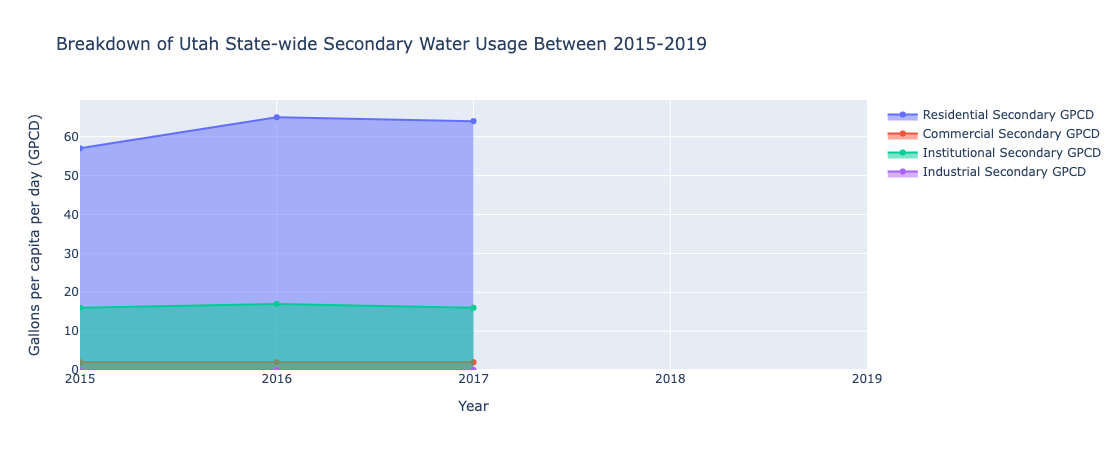

In [95]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ResSecGPCD'],
    fill='tozeroy',
    text='Residential Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ComSecGPCD'],
    fill='tozeroy',
    text='Commercial Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['InsSecGPCD'],
    fill='tozeroy',
    text='Institutional Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['IndSecGPCD'],
    fill='tozeroy',
    text='Industrial Secondary GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Secondary Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

Secondary state-wide water usage is unavailable in 2018 and 2019 unfortunately --> investigate why!

### Water Usage by County

In [97]:
county_MI_2015

,OBJECTID,COUNTYNBR,NAME,TotalGPCD,TotPotGPCD,ResPotGPCD,ComPotGPCD,InsPotGPCD,IndPotGPCD,TotSecGPCD,...,InsSecoUse,IndSecoUse,TotPotaSup,PotaWelSup,PotaSprSup,PotaSurSup,Year,Region,SHAPE_Length,SHAPE_Area
0,1,13,KANE,304,239,142,43,52,2,65,...,3.63,0,7622.6,7075.2,547.4,0.0,2015,Lower Colorado River South,559303.302289,1.063303e+10
1,2,14,MILLARD,532,342,231,43,47,21,190,...,101.51,0,12178.7,8644.4,3534.3,0.0,2015,Sevier River,582471.707002,1.770826e+10
2,3,20,SANPETE,365,140,94,10,31,5,224,...,1038.00,0,15400.4,4663.7,10736.7,0.0,2015,Sevier River,317644.123061,4.147632e+09
3,4,4,CARBON,273,180,127,22,22,9,92,...,795.54,0,15471.0,499.0,4269.9,10702.1,2015,Upper Colorado River,333195.741887,3.843905e+09
4,5,25,UTAH,218,132,90,29,9,3,86,...,10650.10,22,232444.0,145138.2,50274.9,37031.0,2015,Provo River,481178.434851,5.544635e+09
5,6,3,CACHE,284,207,118,72,10,7,77,...,2726.05,0,71704.6,42645.8,26010.2,3048.6,2015,Bear River,289950.959577,3.035799e+09
6,7,22,SUMMIT,342,253,152,90,10,0,89,...,2240.90,0,37602.7,18926.0,3782.7,14893.9,2015,Weber River,476985.932134,4.866990e+09
7,8,27,WASHINGTON,303,231,179,33,17,1,72,...,8450.14,0,61489.3,25946.0,8123.4,27420.0,2015,Lower Colorado River South,347295.034059,6.297853e+09
8,9,10,GRAND,313,251,154,76,18,2,62,...,408.90,0,5702.6,3462.7,2239.9,0.0,2015,Upper Colorado River,516061.273388,9.538699e+09
9,10,24,UINTAH,239,187,146,25,7,9,52,...,658.70,0,25662.5,183.8,8924.7,16554.0,2015,Green River,540715.085279,1.166982e+10


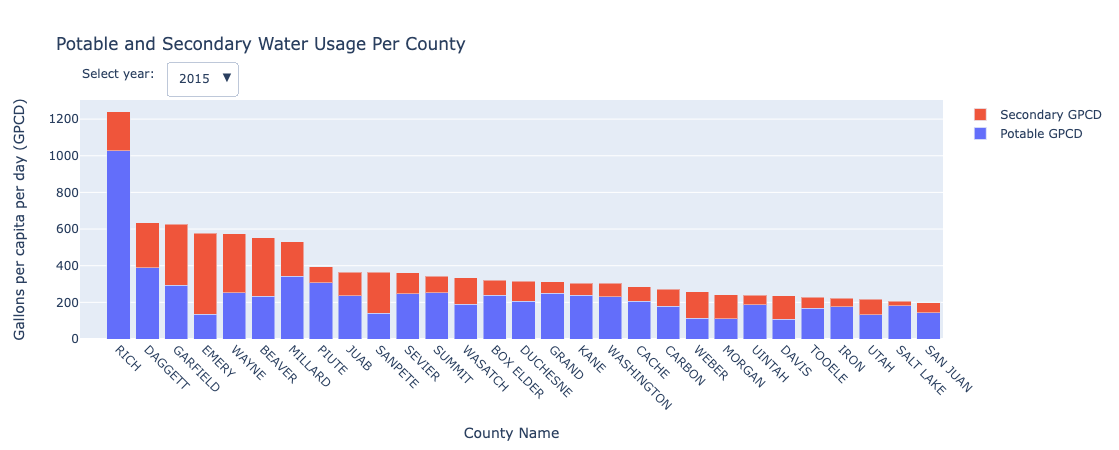

In [137]:
# highlight Salt Lake County
# add total GPCD state-wide (is this a mean, median, sum??)
# color / label the counties that meter secondary water

# import plotly.express as px


# fig = px.bar(county_MI_2015, x='NAME', y='TotSecGPCD', height=400)

import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotPotGPCD'], 
    name='Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotSecGPCD'], 
    name='Secondary GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'y':[county_MI_2015['TotPotGPCD'],county_MI_2015['TotSecGPCD']]}],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{'y':[county_MI_2016['TotPotGPCD'],county_MI_2016['TotSecGPCD']]}],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{'y':[county_MI_2017['TotPotGPCD'],county_MI_2017['TotSecGPCD']]}],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{'y':[county_MI_2018['TotPotGPCD'],county_MI_2018['TotSecGPCD']]}],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{'y':[county_MI_2019['TotPotGPCD'],county_MI_2019['TotSecGPCD']]}],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()